**Grupo 1:**
<br>Juana Mejía 
<br>Daniela Espinosa
<br>Pablo Ortega

## Inteligencia de negocios
### Laboratorio 2 - Agrupación

In [719]:
import pandas as pd

Carga de datos

In [720]:
df = pd.read_csv('202420_Laboratorio 2 - Agrupación_202420_Laboratorio_2_-_Agrupación_data.csv')

In [721]:
df.shape

(1000, 23)

#### Descripción General de los Datos
Este conjunto de datos médicos contiene información sobre 1000 pacientes con 23 características tanto clínicas como demográficas, con el fin de estimar el tiempo aproximado de hospitalización de un paciente. A continuación, se describen las características de las variables, el perfil de los datos y el análisis de calidad de datos.

In [722]:
pd.set_option('display.max_columns', None)
df.head()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Queja_Principal,Estado_Mental,Dolor,dolor_NRS,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Diagnostico_En_Urgencias,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Duracion_KTAS_Min,Error_Triaje
0,2,2,49,2,1,ant. chest pain,1,1,2,150.0,90.0,92.0,20.0,36.2,98.0,2,Ischaemic chest pain,2,2,0,1591,"2,00",0
1,2,2,30,4,1,headache,1,1,4,140.0,80.0,76.0,20.0,36.3,99.0,3,"Subarachnoid haemorrhage, unspecified",7,3,0,211,"3,00",0
2,2,1,61,3,2,ant. chest pain,1,1,3,100.0,60.0,84.0,20.0,36.4,98.0,4,Contusion of front wall of thorax,1,4,0,119,"2,00",0
3,2,2,61,3,1,headache,1,1,4,120.0,70.0,76.0,20.0,36.5,99.0,4,Headache,1,3,4,414,"2,00",2
4,1,2,67,3,1,fever & chill,1,0,#BOÞ!,143.0,70.0,130.0,20.0,38.1,NaN,4,Fever,1,2,1,267,"3,60",2


#### Estadísticas descriptivas

In [723]:
pd.set_option('display.max_columns', None)
df.describe()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Estado_Mental,Dolor,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Error_Triaje
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,983.000000,979.000000,988.000000,985.000000,989.000000,444.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.450000,1.514000,53.892000,2.811000,1.2000,1.103000,0.562000,133.485249,79.566905,84.400810,19.450761,36.562993,97.047297,3.328000,1.610000,3.260000,0.569000,12792.480000,0.253000
std,0.497743,0.500054,19.826483,0.796186,0.4002,0.431946,0.496389,27.156136,15.174593,16.297428,2.069882,0.519699,4.761112,0.862067,1.161572,0.865534,1.587375,87721.151446,0.630387
min,1.000000,1.000000,16.000000,1.000000,1.0000,1.000000,0.000000,50.000000,31.000000,32.000000,14.000000,35.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,36.000000,2.000000,1.0000,1.000000,0.000000,114.000000,70.000000,73.000000,18.000000,36.200000,97.000000,3.000000,1.000000,3.000000,0.000000,132.750000,0.000000
50%,1.000000,2.000000,56.000000,3.000000,1.0000,1.000000,1.000000,130.000000,80.000000,82.000000,20.000000,36.500000,98.000000,3.000000,1.000000,3.000000,0.000000,270.500000,0.000000
75%,2.000000,2.000000,70.250000,3.000000,1.0000,1.000000,1.000000,150.000000,90.000000,96.000000,20.000000,36.800000,99.000000,4.000000,2.000000,4.000000,0.000000,620.000000,0.000000
max,2.000000,2.000000,94.000000,7.000000,2.0000,4.000000,1.000000,275.000000,160.000000,148.000000,30.000000,39.800000,100.000000,5.000000,7.000000,5.000000,9.000000,709510.000000,2.000000


Las estadísticas descriptivas nos permiten observar varias cosas:

1. **Count** -> Existen valores faltantes en las columnas SBP, DBP, HR, RR, BT, Saturación.
2. **Mean y std** -> Nos permiten tener una primera imagen mental de cómo se distribuyen los datos.
3. **Mean, std, min, max** -> Es evidente que la variable objetivo está extremadamente dispersa y muy posiblemente tiene casos atípicos.

Es importante recalcar que en la tabla se presentan varias estadísticas de las variables categóricas codificadas; sin embargo, muchas de estas, como el promedio y la desviación estándar, no tienen sentido y, por lo tanto, no sirven para sacar conclusiones.

A continuación se observan histogramas de las distribuciones de cada característica.

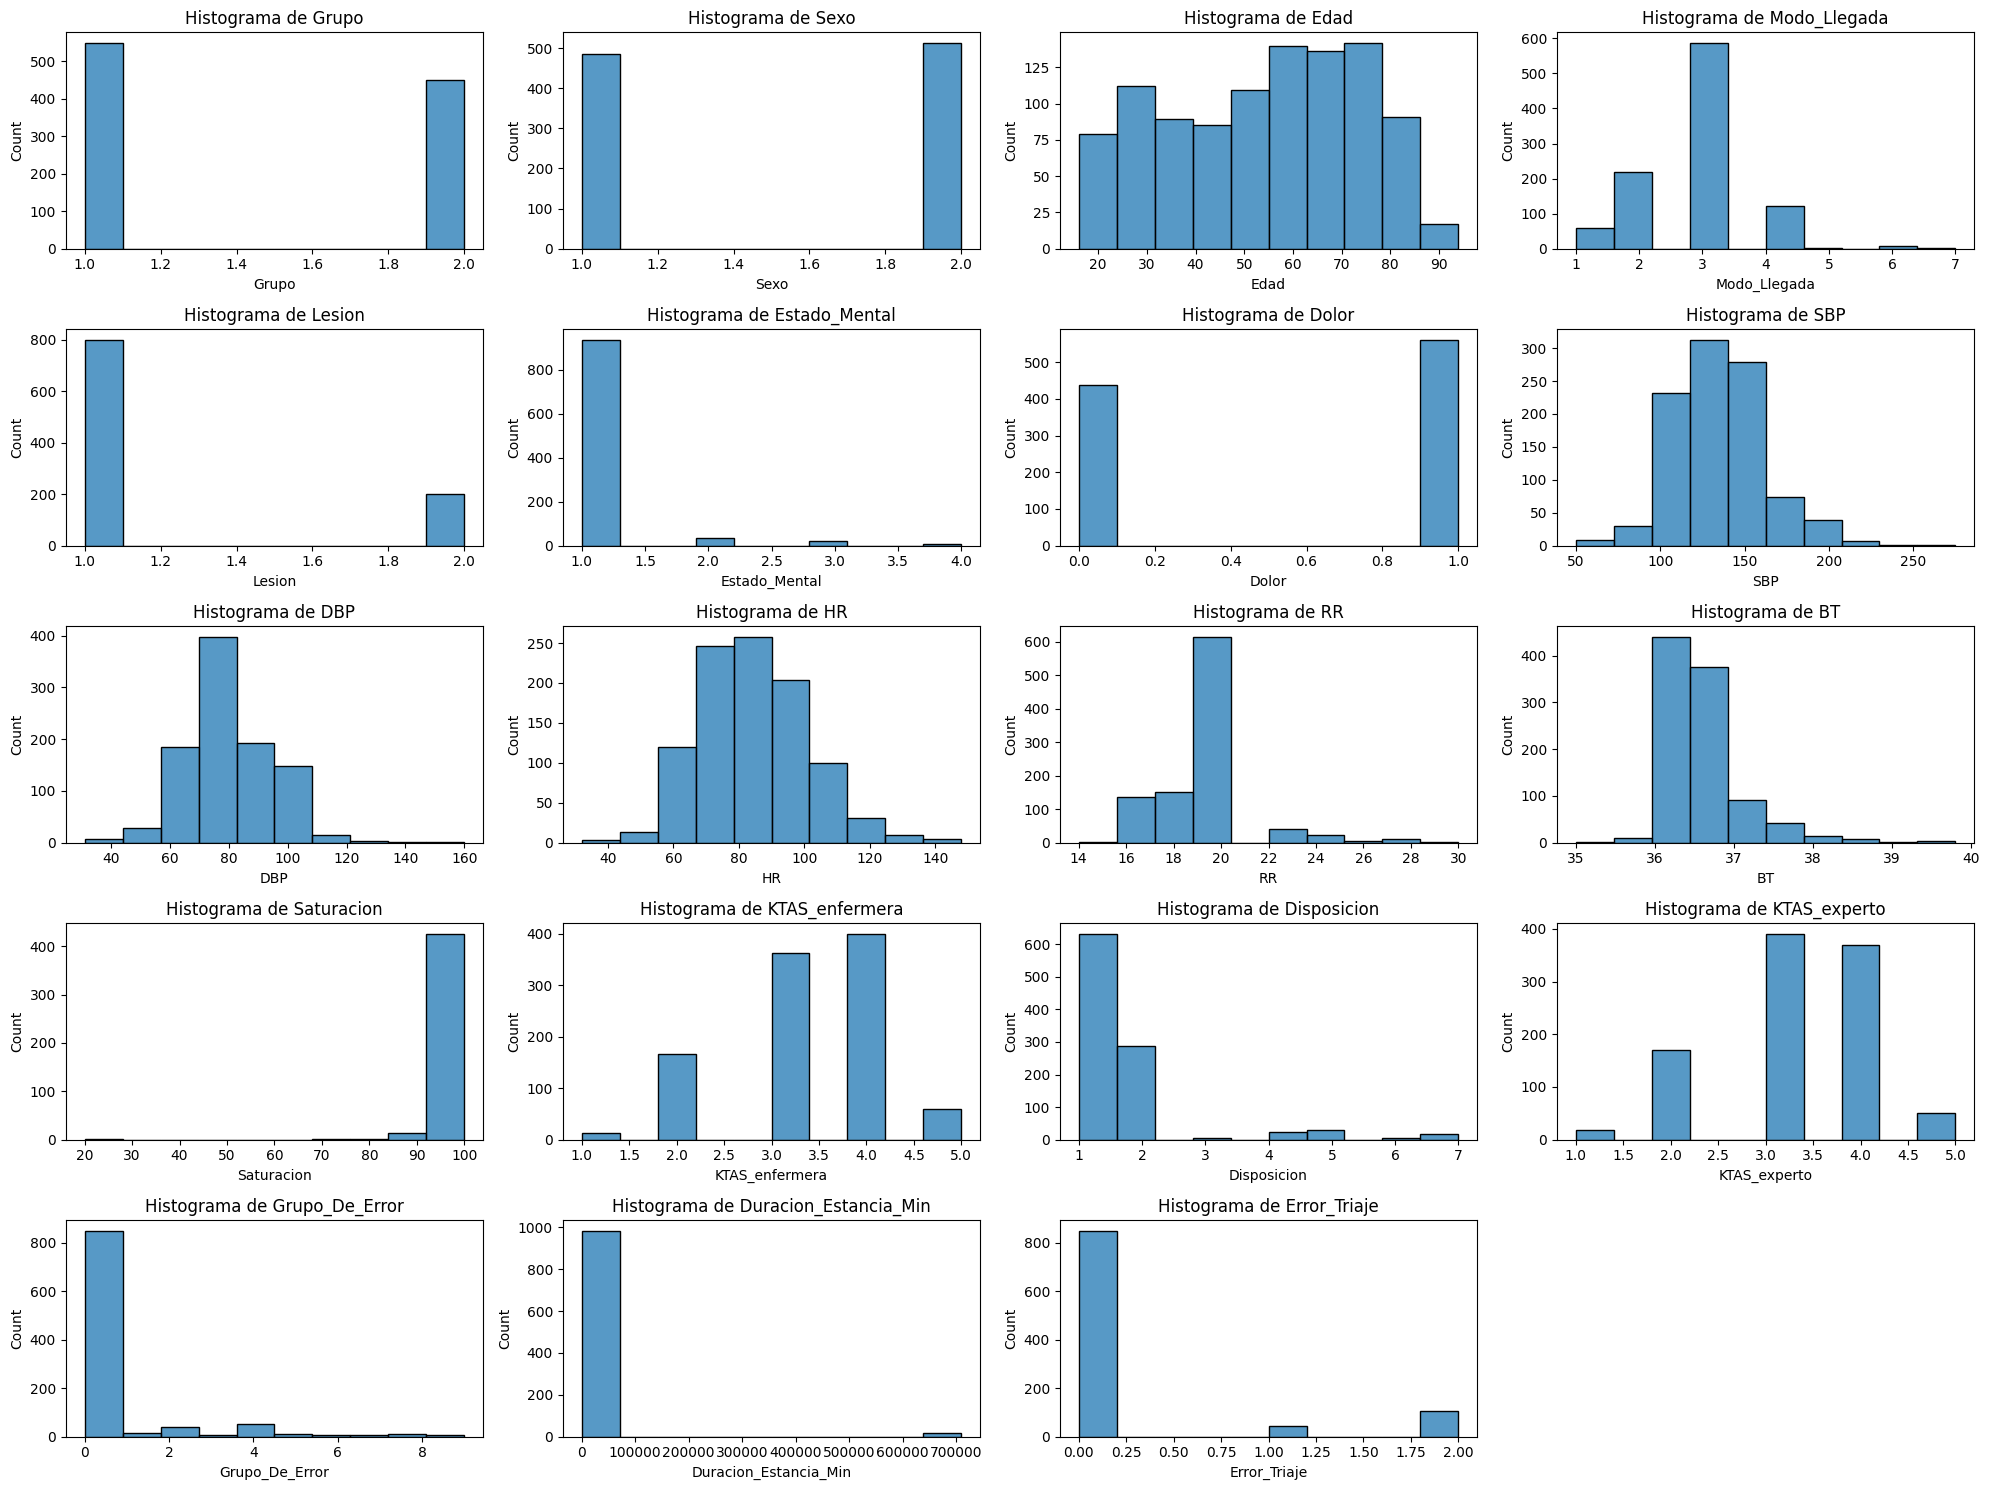

In [724]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de características
features = ['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental', 
            'Dolor', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturacion', 
            'KTAS_enfermera', 'Disposicion', 'KTAS_experto', 
            'Grupo_De_Error', 'Duracion_Estancia_Min', 'Error_Triaje']

plt.figure(figsize=(20, 15)) 

for i, feature in enumerate(features):
    plt.subplot(5, 4, i+1)  # Crear subplots en una cuadrícula de 5 filas y 4 columnas
    sns.histplot(data=df, x=feature, kde=False, bins=10)  # Crear histograma
    plt.title(f'Histograma de {feature}')
    plt.tight_layout()

# Mostrar la gráfica
plt.show()


#### Niveles de variables categóricas

In [725]:
categoricas=['Grupo','Sexo','Modo_Llegada',"Lesion",'Queja_Principal','Estado_Mental','Dolor','dolor_NRS','KTAS_enfermera','Diagnostico_En_Urgencias','Disposicion','KTAS_experto','Grupo_De_Error','Error_Triaje']
data_categorica=df[categoricas]

levels = data_categorica.apply(pd.Series.unique)
num_levels = data_categorica.apply(pd.Series.nunique)

print(levels)
print(num_levels)

Grupo                                                                  [2, 1]
Sexo                                                                   [2, 1]
Modo_Llegada                                            [2, 4, 3, 1, 6, 5, 7]
Lesion                                                                 [1, 2]
Queja_Principal             [ant. chest pain, headache, fever & chill, dys...
Estado_Mental                                                    [1, 4, 2, 3]
Dolor                                                                  [1, 0]
dolor_NRS                              [2, 4, 3, #BOÞ!, 6, 5, 7, 8, 1, 9, 10]
KTAS_enfermera                                                [2, 3, 4, 1, 5]
Diagnostico_En_Urgencias    [Ischaemic chest pain, Subarachnoid haemorrhag...
Disposicion                                             [2, 7, 1, 5, 6, 3, 4]
KTAS_experto                                                  [2, 3, 4, 1, 5]
Grupo_De_Error                                 [0, 4, 1, 2, 6, 7

Debido a que el método `describe()` no nos proporciona información útil sobre las variables categóricas, investigaremos los niveles y el número de niveles por variable categórica. Esto nos permitirá comparar la información con el diccionario de datos y tomar decisiones informadas para la limpieza de datos y la selección de variables. Es posible observar las siguientes cosas:

1. **Modo_Llegada**: El diccionario de datos tiene codificación de 1 a 5, pero los datos tienen niveles de 1 a 7.
2. **Dolor**: Está codificado como 0 o 1 en el diccionario de datos; sin embargo, en el dataset existen las categorías 1 y 2.
3. **dolor_NRS**: Tiene un error de formato, "#BOÞ!".
4. **Error_Triaje**: No es binaria, por lo que es necesario preguntar su significado.
5. **Queja_principal y Diagnostico_En_Urgencias**: No se pueden tratar como variables categóricas debido a que tienen demasiados niveles.

#### Análisis de las observaciones:

Como determinamos que dolor_NRS tenía un error de formato, necesitamos saber a cuántas filas afecta este error para decidir cómo proceder. Es posible observar que existen demasiadas instancias del error como para eliminar las filas entonces debemos considerar eliminar la columna o imputar el error.

In [726]:
df['dolor_NRS'].value_counts()

dolor_NRS
#BOÞ!    440
3        209
4        111
5        109
6         59
2         31
7         27
8          8
10         3
1          2
9          1
Name: count, dtype: int64

El número de errores es bastante alto, pero como también se tiene la columna Dolor, podemos usarla para analizar el significado y la posible intención del recopilador de datos. 

In [727]:
d_dolor = df[df['Dolor']==0]
d_dolor['dolor_NRS'].value_counts()

dolor_NRS
#BOÞ!    438
Name: count, dtype: int64

Observamos que de las 440 instancias con el error, 438 ocurren cuando el paciente no reporta dolor. Por lo tanto, asumimos que el error se produce cuando el paciente no tiene dolor y no se le asigna un valor de dolor_NRS.

Revisamos los niveles del modo llegada debido a que existen dos niveles que no están explicado en el diccionario de datos.

In [728]:
df['Modo_Llegada'].value_counts()

Modo_Llegada
3    588
2    220
4    122
1     60
6      7
5      2
7      1
Name: count, dtype: int64

Hay solo 8 instancias con valores de 6 y 7 (que no están especificaods en el diccionario), por lo que podemos asumir que estos datos se pueden incluir en el Modo_Llegada 5.

Revisión de valores faltantes para cada una de las columnas:

In [729]:
# Número de faltantes por columna
nan_count_per_column = df.isna().sum()
print(nan_count_per_column)

Grupo                         0
Sexo                          0
Edad                          0
Modo_Llegada                  0
Lesion                        0
Queja_Principal               0
Estado_Mental                 0
Dolor                         0
dolor_NRS                     0
SBP                          17
DBP                          21
HR                           12
RR                           15
BT                           11
Saturacion                  556
KTAS_enfermera                0
Diagnostico_En_Urgencias      1
Disposicion                   0
KTAS_experto                  0
Grupo_De_Error                0
Duracion_Estancia_Min         0
Duracion_KTAS_Min             0
Error_Triaje                  0
dtype: int64


Las columnas SBP, DBP, HR, RR y BT tienen faltantes.

**Análisis de la variable objetivo:**

Revisión de como se distribuye la variable objetivo. Recordando que existian valores extremos.

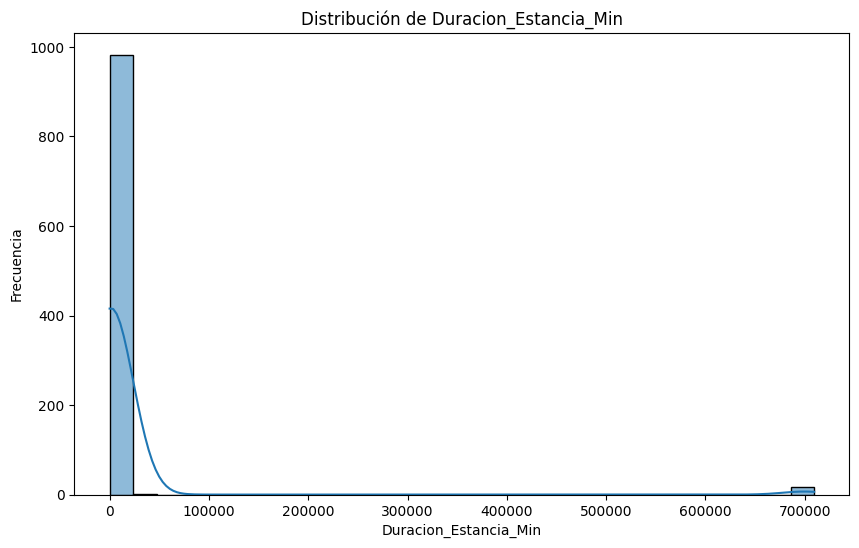

In [730]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

In [731]:
df[df["Duracion_Estancia_Min"] >= 10000]["Duracion_Estancia_Min"].count()

57

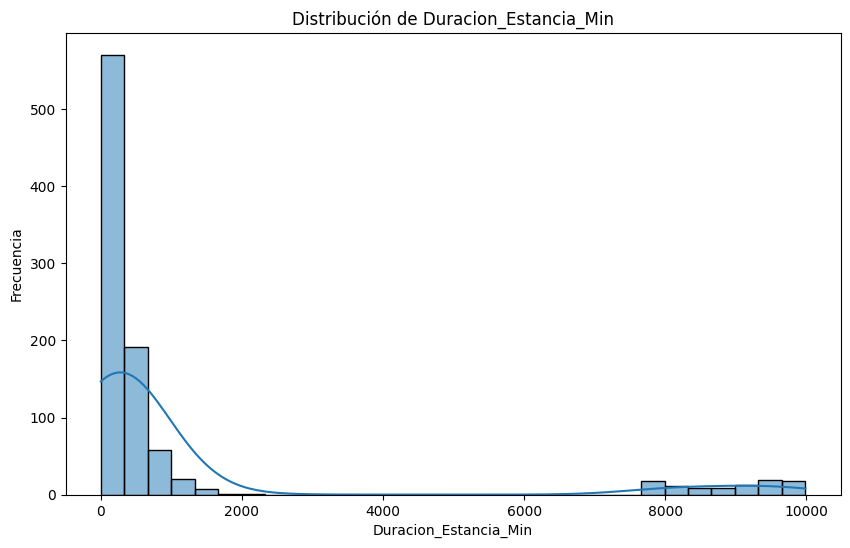

In [732]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df[(df["Duracion_Estancia_Min"] >= 0) & (df["Duracion_Estancia_Min"] <= 10000)]["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

In [733]:
df[df["Duracion_Estancia_Min"] >= 2100]["Duracion_Estancia_Min"].count()

151

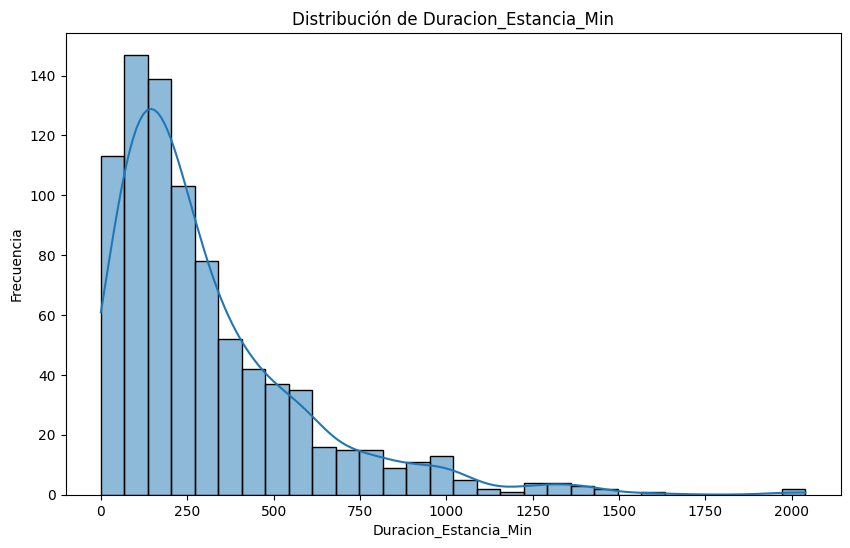

In [734]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df[df["Duracion_Estancia_Min"] <= 5000]["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

En las graficas se puede observar que existen valores atípicos que pueden afectar el ajuste del modelo.

### Análisis de Calidad de Datos

##### Valores Faltantes
- **Saturacion**, **BT (Temperatura Corporal)**, **dolor_NRS**, **SBP**, **DBP**, **HR**, **RR**: Tienen valores faltantes.

##### Distribución de Datos
- **Duracion_Estancia_Min**: Muestra alta variabilidad, con algunos valores extremadamente altos que podrían ser atípicos.

##### Valores Atípicos
- **Duracion_Estancia_Min**: Presenta valores extremos que pueden ser errores o casos excepcionales.

##### Consistencia de Datos
- **dolor_NRS**: Muestra un rango amplio (1 a 10) pero con una media baja, lo cual es consistente con el reporte de dolor.


### Limpieza de datos

In [735]:
# Se copia el df para no alterar los datos originales.
data = df.copy()

Se debe convertir la variable Duracion_KTAS_Min a float para que se pueda utilizar en el modelo:

In [736]:
# Conversión de String a float 
data['Duracion_KTAS_Min'] = data['Duracion_KTAS_Min'].str.replace(',', '.').astype(float)
data['Duracion_KTAS_Min'].describe()

count    1000.000000
mean        5.529710
std         3.439131
min         1.000000
25%         3.000000
50%         4.630000
75%         7.020000
max        17.370000
Name: Duracion_KTAS_Min, dtype: float64

Queja_Principal y Diagnostico_En_Urgencias son columnas de texto y no las usaremos en el primer modelo, después exploraremos el procesamiento de texto. \
Por otro lado, la saturación tiene casi la mitad de valores faltantes y por esto decidimos no utilizarla.

In [737]:
# Se quitan las columnas por la cantidad tan alta de categorías
data=data.drop(columns=['Queja_Principal','Diagnostico_En_Urgencias','Saturacion'])

Imputamos el #BOÞ! con 1 para poder usar la columna en el modelo. Esto con base en lo explorado anteriormente.

In [738]:
# Dolor BOP
data['dolor_NRS'] = pd.to_numeric(data['dolor_NRS'].replace('#BOÞ!', 1))

Cambiamos los niveles 6 y 7 de Modo_Llegada a 5 para tener la misma logica del diccionario de datos.

In [739]:
# Modo_Llegada
data['Modo_Llegada'] = data['Modo_Llegada'].replace(6, 5)
data['Modo_Llegada'] = data['Modo_Llegada'].replace(7, 5)
data['Modo_Llegada'].value_counts()

Modo_Llegada
3    588
2    220
4    122
1     60
5     10
Name: count, dtype: int64

#### Imputación de las filas con valores NaN:

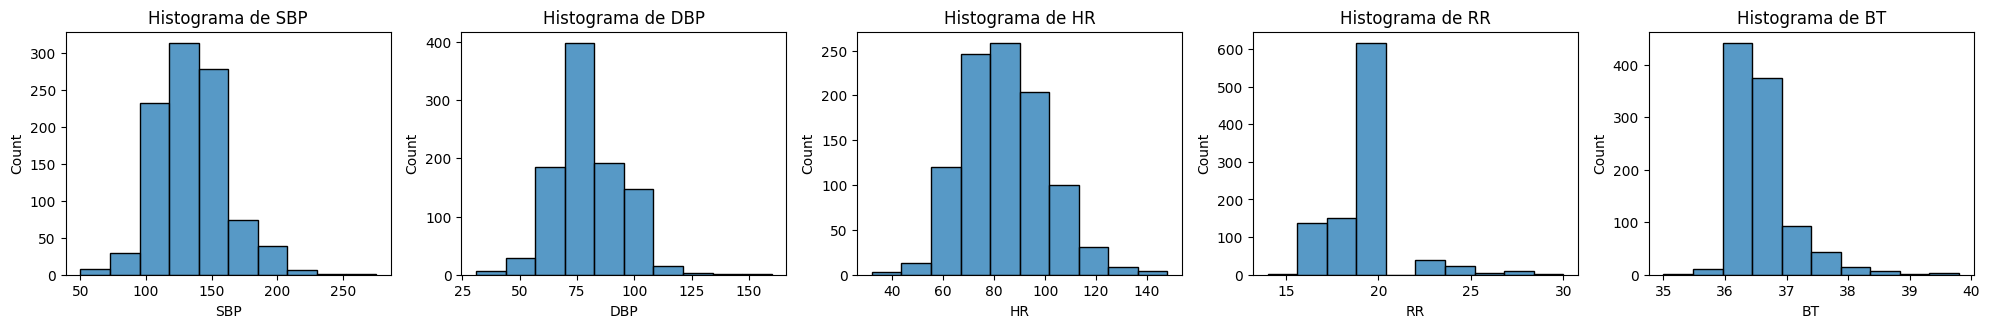

In [740]:
# Lista de características
features = ['SBP', 'DBP', 'HR', 'RR', 'BT']

plt.figure(figsize=(20, 15)) 

for i, feature in enumerate(features):
    plt.subplot(5, 5, i+1)  # Crear subplots en una cuadrícula de 5 filas y 5 columnas
    sns.histplot(data=df, x=feature, kde=False, bins=10)
    plt.title(f'Histograma de {feature}')
    plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [741]:
columnas_imputar = ['SBP', 'DBP', 'HR', 'RR', 'BT']
for columna in columnas_imputar:
    print(columna)
    print(f'Media: {data[columna].mean()}')
    print(f'Mediana: {data[columna].median()}')
    print(f'Moda: {data[columna].mode()[0]}')

SBP
Media: 133.4852492370295
Mediana: 130.0
Moda: 120.0
DBP
Media: 79.56690500510726
Mediana: 80.0
Moda: 80.0
HR
Media: 84.40080971659918
Mediana: 82.0
Moda: 80.0
RR
Media: 19.450761421319797
Mediana: 20.0
Moda: 20.0
BT
Media: 36.56299292214358
Mediana: 36.5
Moda: 36.0


A partir del comportamiento de las características y teniendo en cuenta que estas tienen valores enteros, la medida más precisa para imputar sería la moda, ya que representa el valor que aparece con mayor frecuencia y es más adecuado para este tipo de datos. La media generaría valores decimales que no son acordes a los valores originales, y la mediana también cuando el número de datos es par. 

In [742]:
# Imputar valores NaN con la media de cada columna
for columna in columnas_imputar:
    data[columna] = data[columna].fillna(data[columna].mode()[0])

Decidimos quitar los valores atípicos para mejorar el rendimiento del modelo en los casos mas comunes. Sin embargo, esto significa que el modelo no se funcionará muy bien para valores extremos.

In [743]:
# Eliminar las filas donde Duracion_Estancia_Min > 2100
data = data[data["Duracion_Estancia_Min"] <= 2100]
data["Duracion_Estancia_Min"].describe()

count     849.000000
mean      308.449941
std       285.380122
min         0.000000
25%       118.000000
50%       216.000000
75%       411.000000
max      2040.000000
Name: Duracion_Estancia_Min, dtype: float64

### Selección de Variables para el Modelado

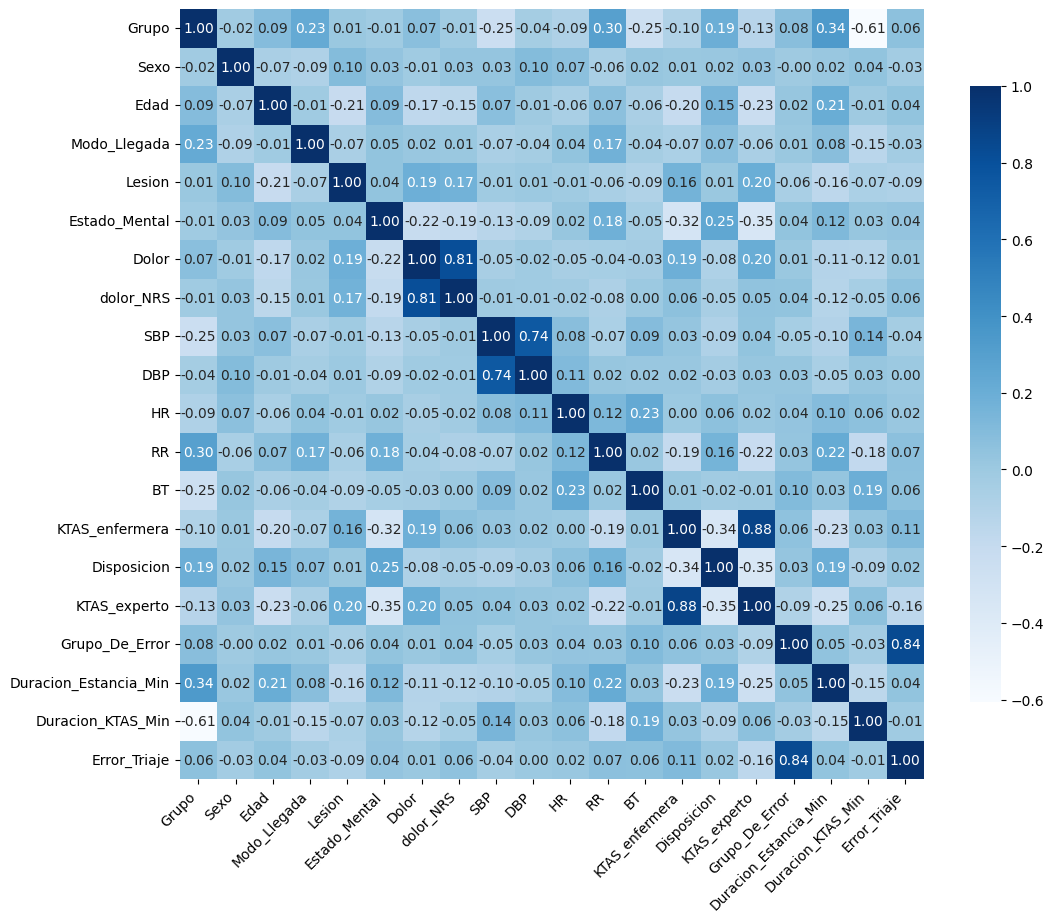

Index(['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental',
       'Dolor', 'dolor_NRS', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'KTAS_enfermera',
       'Disposicion', 'KTAS_experto', 'Grupo_De_Error',
       'Duracion_Estancia_Min', 'Duracion_KTAS_Min', 'Error_Triaje'],
      dtype='object')


In [744]:
import seaborn as sb
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = data.corr(numeric_only= True)

# Set up the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
sb.heatmap(corr, cmap="Blues", annot=True, annot_kws={"size": 10}, fmt=".2f", 
           cbar_kws={"shrink": 0.8})

# Rotate the x and y labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Show the plot
plt.show()

print(data.columns)

En la matriz de correlación es posible identificar variables correlacionadas que podrían ser eliminadas ya que una explica a la otra. Las principales son:
- Dolor con Dolor_NRS
- SBP con DBP
- KTAS_enfermera con KTAS_experto
- Grupo_De_Error con Error_Triaje

<Axes: >

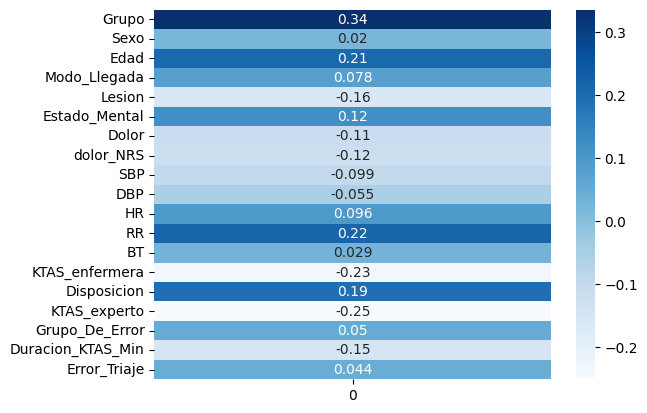

In [745]:
corrw = data.drop(['Duracion_Estancia_Min'], axis=1).corrwith(data['Duracion_Estancia_Min'], numeric_only= True)
sb.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

Según lo observado en la matriz de correlación con la variable objetivo decidimos eliminar las columnas DBP, KTAS_enfermera y Error_Triaje, ya que tienen una menor correlación con la Duracion_Estancia_Min que SBP, KTAS_experto y Grupo_De_Error respectivamente. Además eliminamos dolor_NRS ya que tiene una alta correlación con dolor y dolor está completa y tiene mayor correlación con la variable objetivo.

In [746]:
data=data.drop(columns=['DBP', 'KTAS_enfermera', 'Error_Triaje', 'dolor_NRS', 'Grupo_De_Error'])
data.columns

Index(['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental',
       'Dolor', 'SBP', 'HR', 'RR', 'BT', 'Disposicion', 'KTAS_experto',
       'Duracion_Estancia_Min', 'Duracion_KTAS_Min'],
      dtype='object')

### Implementación de modelos

#### Agglomerative Clustering
Implementado por: Daniela Espinosa

In [652]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import plotly.express as px
import seaborn as sns

Preprocesamiento: Se seleccionan las columnas numéricas para normalizar los datos:

In [747]:
X = data.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Se realiza PCA (Principal Component Analysis):

In [748]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(X_scaled))

pca.explained_variance_

array([2.53478577, 1.88210963, 1.30050021, 1.26300469, 1.06027057,
       0.94591888, 0.89666373, 0.82648072, 0.77069844, 0.73099858,
       0.69079239, 0.65313127, 0.6283846 , 0.51160034, 0.32234887])

Gráfico de varianza explicada acumulada:

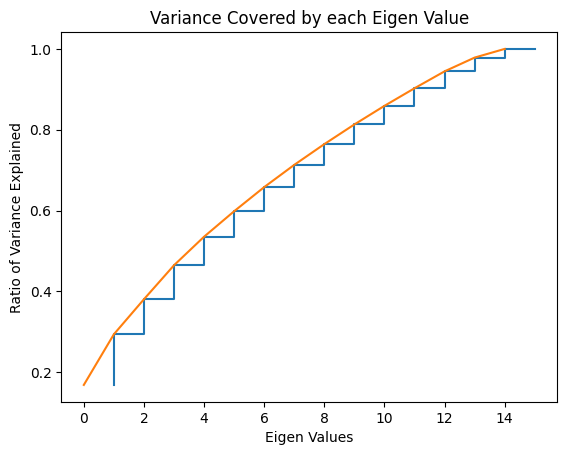

In [749]:
import numpy as np
max = len(pca.explained_variance_) + 1
plt.step(list(range(1,max)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

Este gráfico te permite decidir cuántos componentes principales deberías conservar. En este caso, con 12 componentes se explica más del 90% de la varianza, por lo que se reduce la dimensionalidad a 12.

In [750]:
pca = PCA(n_components = 12) 
X_principal = pca.fit_transform(X_scaled) 
X_principal = pd.DataFrame(X_principal) 

Construcción del Dendograma:

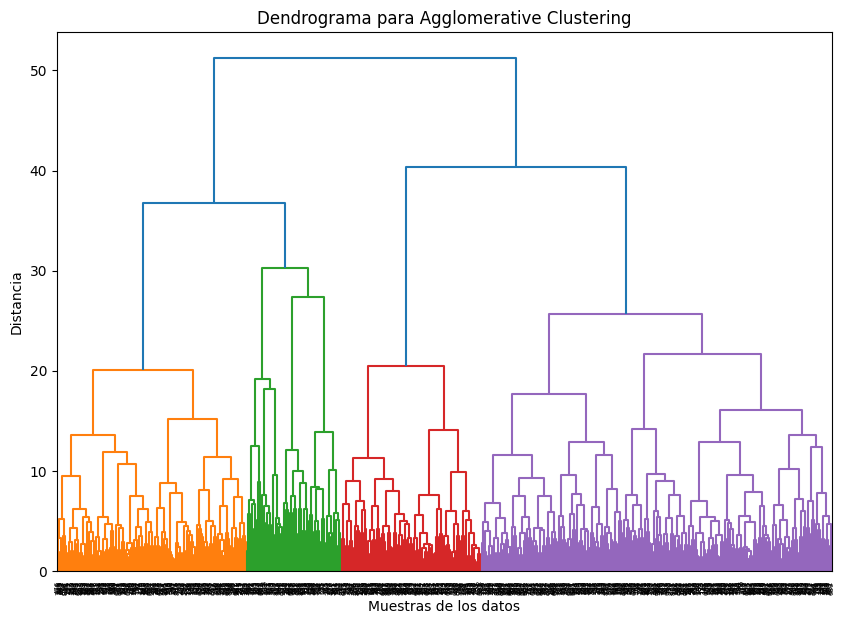

In [770]:
linked = linkage(X_principal, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrograma para Agglomerative Clustering')

plt.xlabel('Muestras de los datos')
plt.ylabel('Distancia')
plt.show()

A partir del Dendograma, parecería que el número óptimo de clusters sería 4. Este número se determina trazando líneas horizontales imaginarias entre cada dos bifurcaciones del árbol. Se elige la línea horizontal que maximice la suma del largo de las ramas verticales que la intersecan, y ese sería el número de clusters que puede ser el indicado. Sin embargo, en la práctica no siempre es la herramienta más precisa o definitiva para tomar esa decisión, por lo que se probarán diferentes configuraciones.

PCA en 3 componentes para poder visualizar los datos en 3D:

In [752]:
pca = PCA(n_components = 3) 
X_pca3 = pca.fit_transform(X_principal) 
X_pca3 = pd.DataFrame(X_pca3)
X_pca3.columns = ['P1', 'P2', 'P3'] 

Modelo con linkage = 'single', 4 clusters

In [755]:
ac3_s = AgglomerativeClustering(n_clusters = 4, linkage = 'single') 
labels3_s = ac3_s.fit_predict(X_principal)

# Visualización en 3D con plotly
fig = px.scatter_3d(
    X_pca3, x='P1', y='P2', z='P3', 
    color=labels3_s, 
    title='Agglomerative Clustering (3D PCA Visualización)',
    labels={'P1': 'Principal Component 1', 'P2': 'Principal Component 2', 'P3': 'Principal Component 3'},
    color_continuous_scale='Viridis'
)
fig.show()

# Evaluación del Modelo
sil_score = silhouette_score(X_principal, labels3_s)
davies_bouldin = davies_bouldin_score(X_principal, labels3_s)
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Score: {davies_bouldin}')


Silhouette Score: 0.42035215329268694
Davies-Bouldin Score: 0.4109420827693324


El linkage 'single' no agrupa adecuadamente los datos.

Modelo con linkage = 'average', 4 clusters

In [754]:
ac3_av = AgglomerativeClustering(n_clusters = 4, linkage = 'average') 
labels3_av = ac3_av.fit_predict(X_principal)

# Visualización en 3D con plotly
fig = px.scatter_3d(
    X_pca3, x='P1', y='P2', z='P3', 
    color=labels3_av, 
    title='Agglomerative Clustering (3D PCA Visualización)',
    labels={'P1': 'Principal Component 1', 'P2': 'Principal Component 2', 'P3': 'Principal Component 3'},
    color_continuous_scale='Viridis'
)
fig.show()

# Evaluación del Modelo
sil_score = silhouette_score(X_principal, labels3_av)
davies_bouldin = davies_bouldin_score(X_principal, labels3_av)
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Score: {davies_bouldin}')

Silhouette Score: 0.3465501304261526
Davies-Bouldin Score: 1.0960541588041466


Con linkage 'average' se ve una división más clara de los clusters, sin embargo sigue sin ser la mejor ya que hay uno muy grande y los demás muy pequeños.

Modelo con linkage = 'ward', 4 clusters

In [ ]:
ac4_w = AgglomerativeClustering(n_clusters = 4, linkage='ward') 
labels4_w = ac4_w.fit_predict(X_principal)

# Visualización en 3D con plotly
fig = px.scatter_3d(
    X_pca3, x='P1', y='P2', z='P3', 
    color=labels4_w, 
    title='Agglomerative Clustering (3D PCA Visualización)',
    labels={'P1': 'Principal Component 1', 'P2': 'Principal Component 2', 'P3': 'Principal Component 3'},
    color_continuous_scale='Viridis'
)
fig.show()

# Evaluación del Modelo
sil_score = silhouette_score(X_principal, labels4_w)
davies_bouldin = davies_bouldin_score(X_principal, labels4_w)
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Score: {davies_bouldin}')

Silhouette Score: 0.1170440408204711
Davies-Bouldin Score: 2.2674205510428997


Con linkage 'ward' se ve una mejor división de los clusters. Se intentará con 3 clusters.

Modelo con linkage = 'ward', 3 clusters

In [765]:
ac3_w = AgglomerativeClustering(n_clusters = 3, linkage='ward') 
labels3_w = ac3_w.fit_predict(X_principal)

# Visualización en 3D con plotly
fig = px.scatter_3d(
    X_pca3, x='P1', y='P2', z='P3', 
    color=labels3_w, 
    title='Agglomerative Clustering (3D PCA Visualización)',
    labels={'P1': 'Principal Component 1', 'P2': 'Principal Component 2', 'P3': 'Principal Component 3'},
    color_continuous_scale='Viridis'
)
fig.show()

# Evaluación del Modelo
sil_score = silhouette_score(X_principal, labels3_w)
davies_bouldin = davies_bouldin_score(X_principal, labels3_w)
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Score: {davies_bouldin}')

Silhouette Score: 0.10610567569074389
Davies-Bouldin Score: 2.327169611867367


Con linkage 'ward' se ve una buena división de los clusters tanto con 3 como con 4 clusters. Por lo que se hará el análisis de interpretabilidad para ambos modelos.

#### Interpretabilidad de los clusters

In [766]:
# Agregar las etiquetas (clusters) a los datos originales
data_4c = data.copy()
data_4c['Cluster'] = labels4_w

# Agrupamos los datos por el clúster asignado y observamos estadísticas descriptivas
cluster_summary = data_4c.groupby('Cluster').agg({
    'Grupo': ['mean', 'std', 'median'],
    'Sexo': ['mean', 'std', 'median'],
    'Edad': ['mean', 'std', 'median'],
    'Modo_Llegada': ['mean', 'std', 'median'],
    'Lesion': ['mean', 'std', 'median'],
    'Estado_Mental': ['mean', 'std', 'median'],
    'Dolor': ['mean', 'std', 'median'],
    'SBP': ['mean', 'std', 'median'],
    'HR': ['mean', 'std', 'median'],
    'RR': ['mean', 'std', 'median'],
    'BT': ['mean', 'std', 'median'],
    'Disposicion': ['mean', 'std', 'median'],
    'KTAS_experto': ['mean', 'std', 'median'],
    'Duracion_Estancia_Min': ['mean', 'std', 'median'],
    'Duracion_KTAS_Min': ['mean', 'std', 'median']
})

cluster_summary

Grupo                       Sexo                        Edad  \
             mean       std median      mean       std median       mean   
Cluster                                                                    
0        1.378641  0.487420    1.0  1.601942  0.491891    2.0  59.786408   
1        1.015625  0.124181    1.0  1.434896  0.496390    1.0  52.755208   
2        1.370130  0.484415    1.0  1.655844  0.476642    2.0  44.090909   
3        1.947115  0.224343    2.0  1.495192  0.501183    1.0  56.855769   

                          Modo_Llegada                     Lesion            \
               std median         mean       std median      mean       std   
Cluster                                                                       
0        18.308174   65.0     2.815534  0.848847    3.0  1.165049  0.373040   
1        20.265663   57.0     2.682292  0.746164    3.0  1.041667  0.200087   
2        18.125331   44.0     2.616883  0.697316    3.0  2.000000  0.000000   
3        18.215520   59.0     2.937500  0.729594    3.0  1.009615  0.097821   

               Estado_Mental                      Dolor                   \
        median          mean       std median      mean       std median   
Cluster                                                                    
0          1.0      1.689320  1.010039    1.0  0.378641  0.487420    0.0   
1          1.0      1.018229  0.152202    1.0  0.523438  0.500102    1.0   
2          2.0      1.032468  0.177817    1.0  0.850649  0.357597    1.0   
3          1.0      1.038462  0.216386    1.0  0.524038  0.500627    1.0   

                SBP                           HR                           RR  \
               mean        std median       mean        std median       mean   
Cluster                                                                         
0        126.194175  34.198687  120.0  92.553398  18.651987   92.0  21.029126   
1        142.830729  27.002079  140.0  84.565104  16.841945   84.0  18.513021   
2        133.701299  22.865943  130.5  81.655844  12.324788   80.0  18.935065   
3        126.639423  22.308114  120.0  81.913462  13.911112   80.0  20.163462   

                                 BT                  Disposicion            \
              std median       mean       std median        mean       std   
Cluster                                                                      
0        3.485140   20.0  36.866990  0.951200   36.5    3.330097  2.026241   
1        1.859233   18.0  36.625000  0.464342   36.6    1.229167  0.586696   
2        1.536805   20.0  36.479221  0.336781   36.5    1.233766  0.674389   
3        0.874884   20.0  36.343750  0.306861   36.3    1.408654  0.492771   

               KTAS_experto                  Duracion_Estancia_Min  \
        median         mean       std median                  mean   
Cluster                                                              
0          2.0     2.368932  0.828302    2.0            531.000000   
1          1.0     3.460938  0.749959    3.0            202.609375   
2          1.0     3.850649  0.569169    4.0            194.357143   
3          1.0     3.144231  0.838889    3.0            478.115385   

                           Duracion_KTAS_Min                   
                std median              mean       std median  
Cluster                                                        
0        459.555710  402.0          6.131359  3.489250  5.000  
1        164.987090  161.0          7.712474  3.435388  6.975  
2        174.869837  148.5          5.329351  3.188733  4.215  
3        269.384961  415.0          3.076298  1.247538  3.000

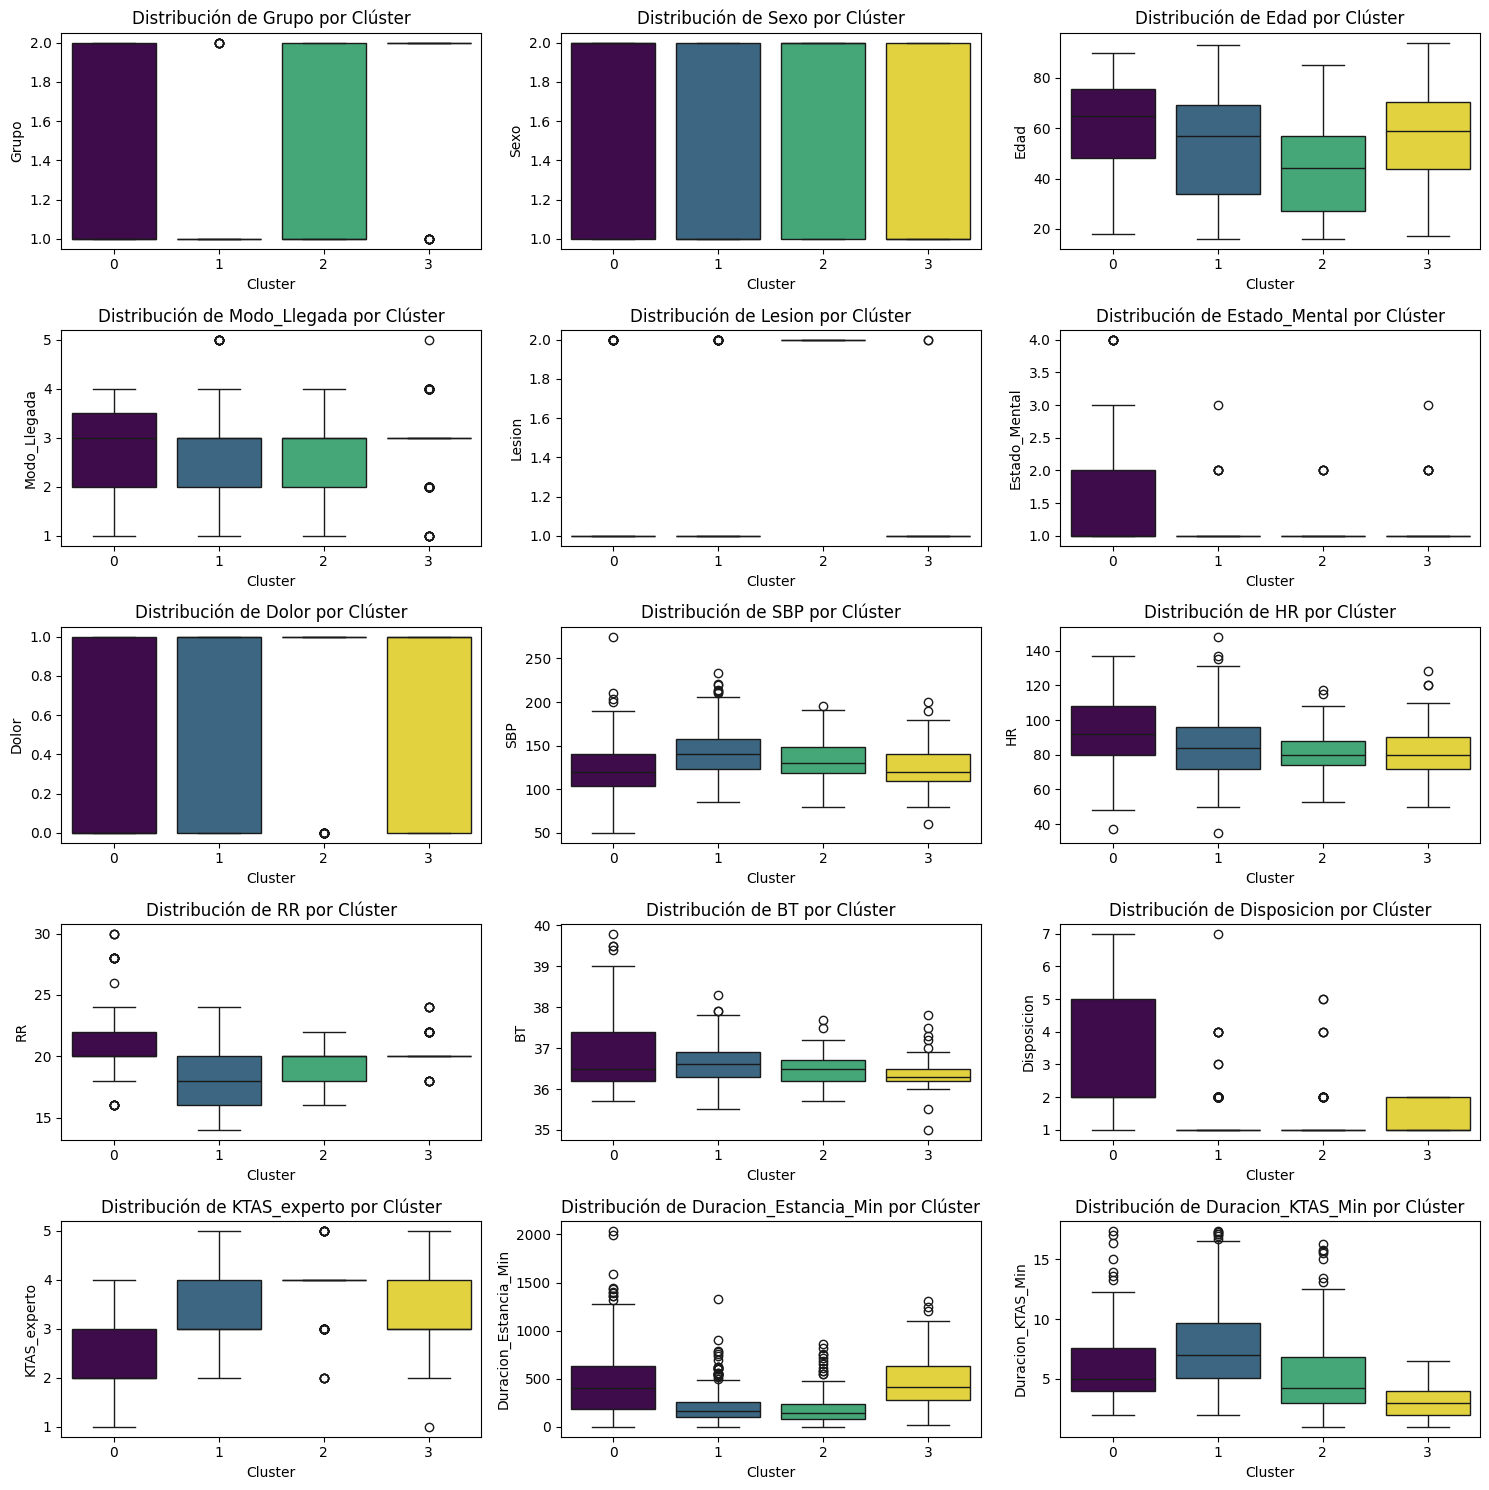

In [767]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subplots para comparar las características en cada cluster 
features = ['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental', 'Dolor', 'SBP', 'HR', 'RR', 'BT', 'Disposicion', 'KTAS_experto', 'Duracion_Estancia_Min', 'Duracion_KTAS_Min']

plt.figure(figsize=(15, 15))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x='Cluster', y=feature, hue='Cluster', data=data_4c, palette='viridis', legend=False)
    plt.title(f'Distribución de {feature} por Clúster')
    plt.tight_layout()

plt.show()

In [763]:
# Agregar las etiquetas (clusters) a los datos originales
data_3c = data.copy()
data_3c['Cluster'] = labels3_w

# Agrupamos los datos por el clúster asignado y observamos estadísticas descriptivas
cluster_summary = data_3c.groupby('Cluster').agg({
    'Grupo': ['mean', 'std', 'median'],
    'Sexo': ['mean', 'std', 'median'],
    'Edad': ['mean', 'std', 'median'],
    'Modo_Llegada': ['mean', 'std', 'median'],
    'Lesion': ['mean', 'std', 'median'],
    'Estado_Mental': ['mean', 'std', 'median'],
    'Dolor': ['mean', 'std', 'median'],
    'SBP': ['mean', 'std', 'median'],
    'HR': ['mean', 'std', 'median'],
    'RR': ['mean', 'std', 'median'],
    'BT': ['mean', 'std', 'median'],
    'Disposicion': ['mean', 'std', 'median'],
    'KTAS_experto': ['mean', 'std', 'median'],
    'Duracion_Estancia_Min': ['mean', 'std', 'median'],
    'Duracion_KTAS_Min': ['mean', 'std', 'median']
})

cluster_summary

Grupo                       Sexo                        Edad  \
             mean       std median      mean       std median       mean   
Cluster                                                                    
0        1.758842  0.428475    2.0  1.530547  0.499870    2.0  57.826367   
1        1.015625  0.124181    1.0  1.434896  0.496390    1.0  52.755208   
2        1.370130  0.484415    1.0  1.655844  0.476642    2.0  44.090909   

                          Modo_Llegada                     Lesion            \
               std median         mean       std median      mean       std   
Cluster                                                                       
0        18.269013   60.0     2.897106  0.771900    3.0  1.061093  0.239887   
1        20.265663   57.0     2.682292  0.746164    3.0  1.041667  0.200087   
2        18.125331   44.0     2.616883  0.697316    3.0  2.000000  0.000000   

               Estado_Mental                      Dolor                   \
        median          mean       std median      mean       std median   
Cluster                                                                    
0          1.0      1.254019  0.679023    1.0  0.475884  0.500223    0.0   
1          1.0      1.018229  0.152202    1.0  0.523438  0.500102    1.0   
2          2.0      1.032468  0.177817    1.0  0.850649  0.357597    1.0   

                SBP                           HR                           RR  \
               mean        std median       mean        std median       mean   
Cluster                                                                         
0        126.491961  26.779971  120.0  85.437299  16.396550   82.0  20.450161   
1        142.830729  27.002079  140.0  84.565104  16.841945   84.0  18.513021   
2        133.701299  22.865943  130.5  81.655844  12.324788   80.0  18.935065   

                                 BT                  Disposicion            \
              std median       mean       std median        mean       std   
Cluster                                                                      
0        2.161972   20.0  36.517042  0.649167   36.4    2.045016  1.527564   
1        1.859233   18.0  36.625000  0.464342   36.6    1.229167  0.586696   
2        1.536805   20.0  36.479221  0.336781   36.5    1.233766  0.674389   

               KTAS_experto                  Duracion_Estancia_Min  \
        median         mean       std median                  mean   
Cluster                                                              
0          2.0     2.887460  0.910620    3.0            495.630225   
1          1.0     3.460938  0.749959    3.0            202.609375   
2          1.0     3.850649  0.569169    4.0            194.357143   

                           Duracion_KTAS_Min                   
                std median              mean       std median  
Cluster                                                        
0        344.335829  411.0          4.088103  2.668185  3.580  
1        164.987090  161.0          7.712474  3.435388  6.975  
2        174.869837  148.5          5.329351  3.188733  4.215

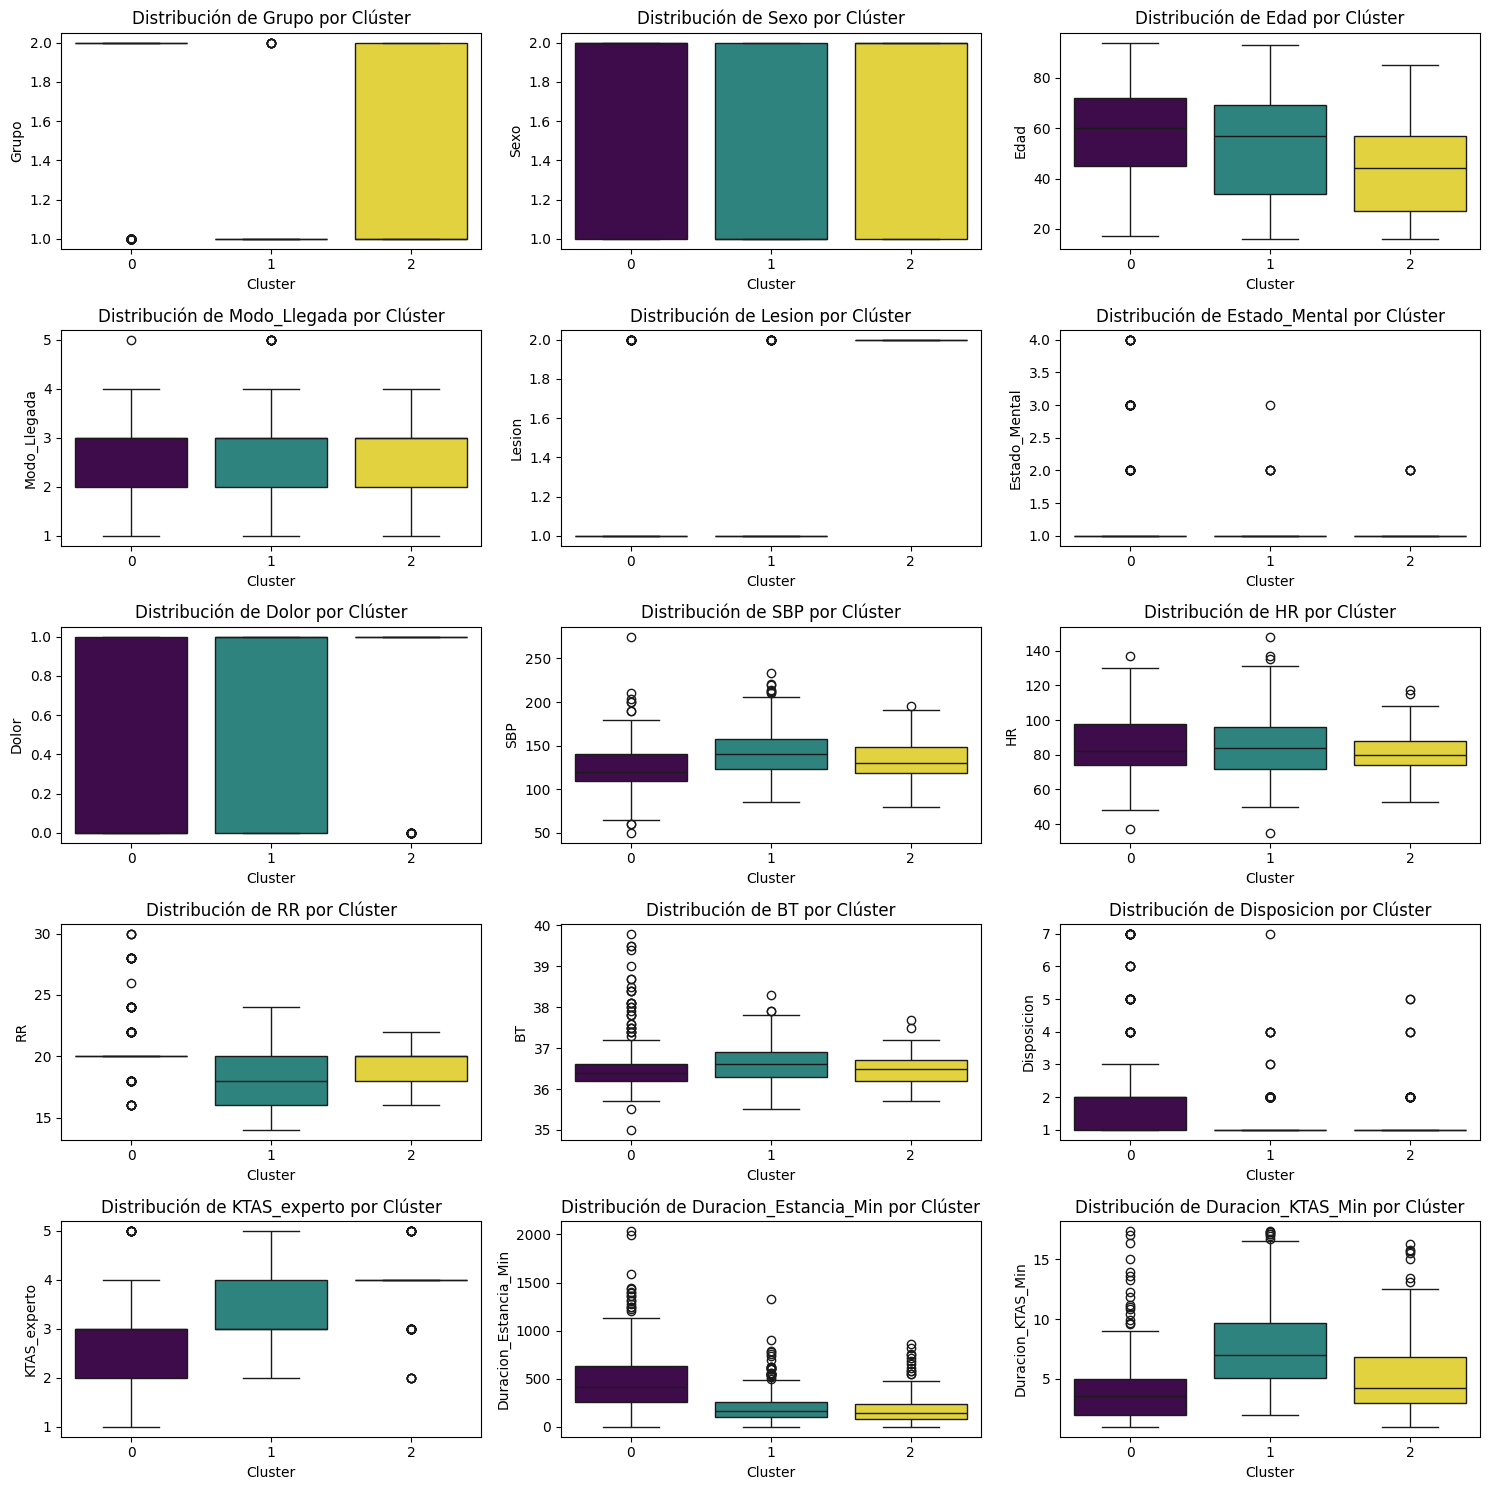

In [764]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subplots para comparar las características en cada cluster 
features = ['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental', 'Dolor', 'SBP', 'HR', 'RR', 'BT', 'Disposicion', 'KTAS_experto', 'Duracion_Estancia_Min', 'Duracion_KTAS_Min']

plt.figure(figsize=(15, 15))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x='Cluster', y=feature, hue='Cluster', data=data_3c, palette='viridis', legend=False)
    plt.title(f'Distribución de {feature} por Clúster')
    plt.tight_layout()

plt.show()


Modelo seleccionado: AgglomerativeClustering(n_clusters = 3, linkage='ward') 

Esto es porque al analizar el comportamiento de las características en cada cluster, podemos observar que la agrupación del modelo con 3 clusters es más significativa y tiene más sentido.